# Import packages and libraries

In [1]:
import os
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load model training history

In [2]:
history = pd.read_csv('satellite_segmentation_epoch_history.csv', index_col=0)
history.head()


,accuracy,f1_score,loss,lr,mIOU,precision,recall,val_accuracy,val_f1_score,val_loss,val_mIOU,val_precision,val_recall
epoch,,,,,,,,,,,,,
0,0.929096,0.022605,0.335640,0.001,0.480955,0.077209,0.046719,0.398524,0.081351,7.379050,0.317355,0.050199,0.657303
1,0.953227,0.000185,0.204641,0.001,0.480955,0.032085,0.000092,0.953358,0.000015,0.173326,0.480944,0.027027,0.000007
2,0.953356,0.001229,0.157413,0.001,0.480956,0.546055,0.000550,0.953370,0.000000,0.168037,0.480944,0.000000,0.000000
3,0.954474,0.112917,0.129341,0.001,0.480956,0.656098,0.062101,0.953482,0.008121,0.164514,0.480944,0.767804,0.003793
4,0.956202,0.274195,0.115423,0.001,0.480956,0.643014,0.175894,0.955076,0.108510,0.151649,0.480944,0.788578,0.056062


# Plot metric vs. epoch

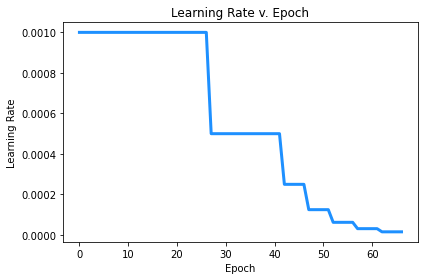

In [5]:
plt.plot(history['lr'], lw=3.0, color='dodgerblue')
        
metric_str = 'Learning Rate'
        
plt.title(f'{metric_str} v. Epoch')
plt.xlabel('Epoch')
    
plt.ylabel(f'{metric_str}')

plt.tight_layout()

plt.savefig(f'figures/{metric}_v_epoch_final_model.png', dpi=200)


In [14]:
def plot_history(history, metric, save_fig=False):
    plt.plot(history[f'{metric}'], lw=3.0, color='dodgerblue')
    plt.plot(history[f'val_{metric}'], lw=3.0, ls='--', color='deeppink')
    
    if metric == 'accuracy':
        metric_str = 'Accuracy'
        plt.ylim(0.9, 1.0)
                
    elif metric == 'f1_score':
        metric_str = 'F1 Score'
        
    elif metric == 'loss':
        metric_str = 'Loss'
        plt.ylim(0.0, 0.4)
        
    elif metric == 'recall':
        metric_str = 'Recall'
        
    elif metric == 'precision':
        metric_str = 'Precision'
        
    elif metric == 'mIOU':
        metric_str = 'mIOU'
        
    else:
        print(f"Metric '{metric}' not defined")
        
    train_score = round(history[f'{metric}'].iloc[-1], 3)
    val_score = round(history[f'val_{metric}'].iloc[-1], 3)

    plt.title(f'{metric_str} v. Epoch')
    plt.xlabel('Epoch')
    
    plt.ylabel(f'{metric_str}')
    plt.legend([f'Train (final score = {train_score:.3f})', 
                f'Validation (final score = {val_score:.3f})'])

    plt.tight_layout()

    if save_fig:
        plt.savefig(f'figures/{metric}_v_epoch_final_model.png', dpi=300)

    plt.close()
    

In [15]:
metric_list = ['loss', 'accuracy', 'f1_score', 'recall', 'precision']
for metric in metric_list:
    plot_history(history, metric, save_fig=True)
    